# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [76]:
df = pd.read_csv("creditcard.csv", delimiter = ',')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [78]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [79]:
X = df.drop(columns = ['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

## Логистическая регрессия

In [46]:
log_reg = LogisticRegression(max_iter=3000) 
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Константа

In [11]:
y_pred_const = np.zeros(len(X_test))
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

## KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=3) # выберем K=5 например
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # оставили только второй столбец
y_pred_proba_knn

array([0., 0., 0., ..., 0., 0., 0.])

## Accuracy

In [31]:
print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_proba_knn.round()))
print(accuracy_score(y_test, y_pred_proba_const))

0.999133925541004
0.9985955549313578
0.9984082955888721


## Precision

In [33]:
print(precision_score(y_test, y_pred_log_reg))
print(precision_score(y_test, y_pred_proba_knn.round()))
print(precision_score(y_test, y_pred_proba_const))

0.7818181818181819
1.0
0.0


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## f1

In [32]:
print(f1_score(y_test, y_pred_log_reg))
print(f1_score(y_test, y_pred_proba_knn.round()))
print(f1_score(y_test, y_pred_proba_const))

0.6991869918699187
0.21052631578947367
0.0


## roc-auc 

In [34]:
print(roc_auc_score(y_test, y_pred_log_reg))
print(roc_auc_score(y_test, y_pred_proba_knn.round()))
print(roc_auc_score(y_test, y_pred_proba_const))

0.8160358021788433
0.5588235294117647
0.5


## recall

In [50]:
print(recall_score(y_test, y_pred_log_reg))
print(recall_score(y_test, y_pred_proba_knn.round()))
print(recall_score(y_test, y_pred_proba_const))

0.6323529411764706
0.11764705882352941
0.0


## ROC-кривая (а почему так получилось...так же не должно) (я починил, я тупой)

C:\Users\Conqu\AppData\Local\Temp\ipykernel_14324\344427919.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', linewidth=3, color = 'red')


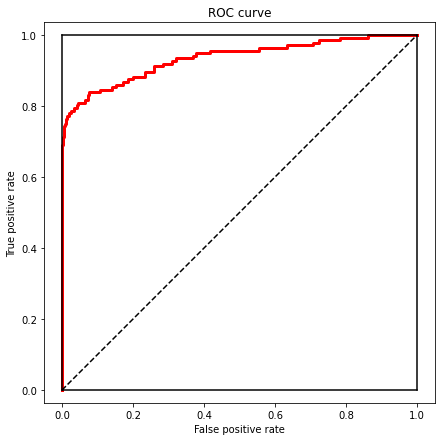

In [53]:
# я понял, где я тупой!!!
y_pred_n_log_reg = log_reg.predict_proba(X_test)[:, 1]  # сорян я это прям тут оставлю

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_n_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3, color = 'red')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

C:\Users\Conqu\AppData\Local\Temp\ipykernel_14324\1387230144.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', linewidth = 3, color = 'red')


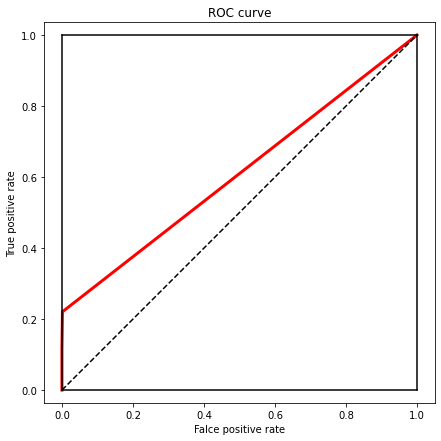

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, 'b', linewidth = 3, color = 'red')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('Falce positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

На самом деле, варианта два.
Нам абсолютно точно нужно максимизировать количество найденных сволочей (читать как преступников).
Но при этом при постоянном бане не тех польхователей хоть и можно написать в поддержку, но польхователи будут расстраиваться и закидывать болтами банк за несправедливый бан.
По причине того, что мы любим наших пользователей, будем максимизировать f1.
Но также можно попробовать намутить recall - но там мы будем просто банить всех подряд, и будет жалко обычных работяг с завода.
Т.к. метрика только одна, берем f1.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [83]:
from sklearn.model_selection import GridSearchCV

grid = {'penalty': ['elasticnet', 'l1', 'l2'],
        "solver": ['liblinear', 'newton-cg']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, grid, scoring="f1")
log_reg_grid.fit(X_train, y_train)

print("best: ", log_reg_grid.best_params_)
print("f1 score:", log_reg_grid.best_score_)

D:\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\

best:  {'penalty': 'l1', 'solver': 'liblinear'}
f1 score: 0.7207913993696525


### попробуем перебрать кф регуляризации и выбрать лучший с наиб. показателем f1

In [92]:
scores = []

for coef in np.arange(0.01, 20.02, 0.2):
    print("coef is:", coef)
    upgr_model = LogisticRegression(penalty="l1", solver='liblinear',  C=coef, random_state=42)
    
    score = cross_val_score(upgr_model, X, y, scoring="f1").mean()
    print('Score:', score)
    scores.append(score)
    print()

coef is: 0.01
Score: 0.5527997685675176

coef is: 0.21000000000000002
Score: 0.7026223776223776

coef is: 0.41000000000000003
Score: 0.6979296336318486

coef is: 0.6100000000000001
Score: 0.7010031554378554

coef is: 0.81
Score: 0.7000950027030773

coef is: 1.01
Score: 0.7015229912791687

coef is: 1.2100000000000002
Score: 0.7010334823456307

coef is: 1.4100000000000001
Score: 0.7010334823456307

coef is: 1.61
Score: 0.7003359950881863

coef is: 1.81
Score: 0.7003359950881863

coef is: 2.01
Score: 0.7003359950881863

coef is: 2.21
Score: 0.7003359950881863

coef is: 2.41
Score: 0.7003359950881863

coef is: 2.61
Score: 0.6986207292219772

coef is: 2.81
Score: 0.7010334823456307

coef is: 3.01
Score: 0.7003359950881863

coef is: 3.21
Score: 0.7003359950881863

coef is: 3.41
Score: 0.7003359950881863

coef is: 3.61
Score: 0.7003359950881863

coef is: 3.81
Score: 0.7003359950881863

coef is: 4.01
Score: 0.7010334823456307

coef is: 4.21
Score: 0.7010334823456307

coef is: 4.41
Score: 0.701

In [94]:
best = max(scores)
print("best is:", best)
print("index is:", scores.index(best))

best is: 0.7026223776223776
index is: 1


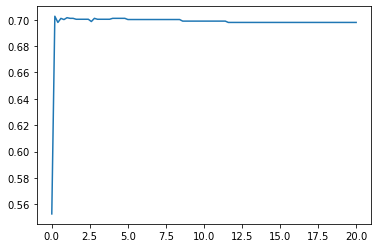

In [95]:
plt.plot(np.arange(0.01, 20.02, 0.2), scores)

Из графика можно сделать 2 вывода:
1. Стоило начать перебирать с большим изменением параметра
2. Лучшее значение достигается при начальном кф регуляризации, лучшее значение = 0.7026223776223776

### Продолжим страдания с KNN (кста качество на log reg чутка выросло)

In [90]:
grid_knn = {'n_neighbors': np.arange(2,6,1), 
        'metric': ['euclidean', 'manhattan'], 
        'weights': ['uniform', 'distance']
        }
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid_knn, scoring="f1")
knn_cv.fit(X_train,y_train)

print("best: ", knn_cv.best_params_)
print("f1 score:", knn_cv.best_score_)

best:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
f1 score: 0.35206706964863793


ска и ради этого я ждал до 6 утра..

Реальный вопрос к проверяющим! Интересно услышать ответ - напишите, пожалуйста
Вот эта модель KNN обучалась ОЧЕНЬ долго - сейчас время 5:58, а она только закончилась (началось обучение примерно часа в 2 ночи, т.е. по факту 4 часа прошло)
Вопрос - почему так долго длится обучение, хотя железо не самое плохое, и какие есть варианты это ускорить? Ну кроме апгрейда железа
Спасибо!

In [98]:
import time
import datetime

In [101]:
new_scores = []

for neigh in np.arange(2,9): #господи сколько я тут просижу то с такими параметрами
    print("number of neighnours is:", neigh)
    new_knn = KNeighborsClassifier(metric = 'manhattan', weights = 'distance', n_neighbors = neigh)
    
    start = datetime.datetime.now()
    
    score_x = cross_val_score(new_knn, X, y, scoring="f1").mean()
    print('Score:', score_x)
    print('Time wasted:', datetime.datetime.now() - start)
    new_scores.append(score_x)
    print()

number of neighnours is: 2
Score: 0.0017425013540888234
Time wasted: 0:39:50.692334

number of neighnours is: 3
Score: 0.0016391250866096979
Time wasted: 0:41:28.880999

number of neighnours is: 4
Score: 0.0016897468347376213
Time wasted: 0:50:51.424713

number of neighnours is: 5
Score: 0.0015985556645066075
Time wasted: 0:50:44.023883

number of neighnours is: 6
Score: 0.0015849023490285632
Time wasted: 0:48:57.726563

number of neighnours is: 7
Score: 0.0015981778541932009
Time wasted: 0:48:55.005380

number of neighnours is: 8
Score: 0.0015791861255745978
Time wasted: 0:48:51.265709



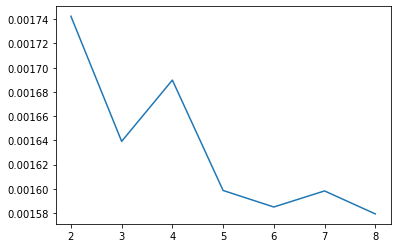

In [103]:
plt.plot(np.arange(2,9), new_scores)

Проанализируем результаты

С учетом выбранной метрики лучшим оказалось решение выбора логистчиеской регрессии с параметрами 'penalty': 'l1', 'solver': 'liblinear' и c = 0.01

Но меня очень пугает решение через KNN - аномально низкая точность (такое ощущение, что я что-то не так сделал)

### На первоначальном тесте const показал для данной f1 точность 0 - ввиду этого тестить его сейчас смысла нет вообще

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

У нас будет датасет предсказания потребления домами эл. энергии

Ключевая колонка - Heating_Load

In [105]:
df1 = pd.read_csv("energy_efficiency_data.csv", delimiter = ',')
df1

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [107]:
df1.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [108]:
df1 = df1.drop(columns = ['Cooling_Load'])
X = df1.drop(columns = ['Heating_Load'])
y = df1['Heating_Load']

In [136]:
y = y.round()
X = X.round()
X

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.0,514.0,294.0,110.0,7.0,2,0.0,0
1,1.0,514.0,294.0,110.0,7.0,3,0.0,0
2,1.0,514.0,294.0,110.0,7.0,4,0.0,0
3,1.0,514.0,294.0,110.0,7.0,5,0.0,0
4,1.0,564.0,318.0,122.0,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,1.0,784.0,343.0,220.0,4.0,5,0.0,5
764,1.0,808.0,368.0,220.0,4.0,2,0.0,5
765,1.0,808.0,368.0,220.0,4.0,3,0.0,5
766,1.0,808.0,368.0,220.0,4.0,4,0.0,5


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_train

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
334,1.0,808.0,368.0,220.0,4.0,4,0.0,1
139,1.0,784.0,343.0,220.0,4.0,5,0.0,2
485,1.0,564.0,318.0,122.0,7.0,3,0.0,5
547,1.0,637.0,343.0,147.0,7.0,5,0.0,1
18,1.0,637.0,343.0,147.0,7.0,4,0.0,0
...,...,...,...,...,...,...,...,...
71,1.0,662.0,416.0,122.0,7.0,5,0.0,1
106,1.0,588.0,294.0,147.0,7.0,4,0.0,2
270,1.0,710.0,270.0,220.0,4.0,4,0.0,5
435,1.0,514.0,294.0,110.0,7.0,5,0.0,4


In [138]:
y_train

334    15.0
139    15.0
485    32.0
547    42.0
18     30.0
       ... 
71     32.0
106    26.0
270    11.0
435    29.0
102    29.0
Name: Heating_Load, Length: 537, dtype: float64

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

## Log reg

In [139]:
log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

y_pred_proba_log_reg = log_reg.predict_proba(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
y_pred_proba_log_reg

array([[1.54519389e-07, 6.96523794e-03, 3.15817202e-02, ...,
        3.53671918e-06, 3.85012299e-04, 9.79595673e-05],
       [1.48579657e-04, 5.47975233e-02, 4.77812362e-03, ...,
        7.41318804e-10, 2.20988526e-07, 8.29415269e-08],
       [1.58624115e-16, 2.09701073e-09, 6.13619441e-06, ...,
        3.17896225e-02, 3.13717703e-02, 1.31220070e-02],
       ...,
       [1.77275807e-09, 3.38629090e-04, 1.29710069e-02, ...,
        4.40352271e-03, 3.59407570e-02, 1.44049526e-02],
       [8.49263647e-06, 3.96125379e-02, 2.03946193e-02, ...,
        5.71029003e-08, 1.08057375e-05, 3.14432702e-06],
       [4.70036265e-12, 1.08805540e-05, 2.05279990e-03, ...,
        1.12604053e-02, 5.79679232e-02, 2.04447820e-02]])

## KNN 

In [143]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

## Самый мощный класс решений - const

In [144]:
from collections import Counter
Counter(y_train)

Counter({15.0: 56,
         32.0: 29,
         42.0: 9,
         30.0: 14,
         43.0: 3,
         13.0: 46,
         10.0: 13,
         11.0: 39,
         24.0: 22,
         31.0: 3,
         6.0: 4,
         40.0: 15,
         36.0: 15,
         14.0: 34,
         12.0: 37,
         37.0: 16,
         29.0: 28,
         16.0: 7,
         19.0: 8,
         17.0: 26,
         27.0: 6,
         33.0: 23,
         26.0: 14,
         18.0: 5,
         25.0: 15,
         20.0: 2,
         39.0: 9,
         28.0: 11,
         41.0: 6,
         8.0: 3,
         35.0: 5,
         7.0: 6,
         38.0: 2,
         34.0: 1,
         21.0: 2,
         23.0: 3})

In [145]:
a = [15.0]*len(X_test)
y_pred_const = np.array(a)
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15

### acc

In [146]:
print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_const))

0.1341991341991342
0.11688311688311688
0.07792207792207792


### precision

In [151]:
print(precision_score(y_test, y_pred_log_reg, average='macro'))
print(precision_score(y_test, y_pred_knn, average='macro'))
print(precision_score(y_test, y_pred_const, average='macro'))

0.08638982849509165
0.12889040783777628
0.0023612750885478157


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
print(precision_score(y_test, y_pred_log_reg, average='micro'))
print(precision_score(y_test, y_pred_knn, average='micro'))
print(precision_score(y_test, y_pred_const, average='micro'))

0.1341991341991342
0.11688311688311688
0.07792207792207792


### recall

In [155]:
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))
print(recall_score(y_test, y_pred_const, average='macro'))

0.10676911719692468
0.12072052082865233
0.030303030303030304


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
print(recall_score(y_test, y_pred_log_reg, average='micro'))
print(recall_score(y_test, y_pred_knn, average='micro'))
print(recall_score(y_test, y_pred_const, average='micro'))

0.1341991341991342
0.11688311688311688
0.07792207792207792


### f1

In [156]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.07686380063526138
0.1196907805236167
0.1196907805236167


In [157]:
print(f1_score(y_test, y_pred_log_reg, average='micro'))
print(f1_score(y_test, y_pred_knn, average='micro'))
print(f1_score(y_test, y_pred_const, average='micro'))

0.1341991341991342
0.11688311688311688
0.07792207792207792


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

В этот раз, в отличие от прошлой задачи, мы уже можем не заботиться о домах, попавших не в ту категорию - тут бы дай бог просто что-то угадать да побольше; поэтому возьмем метрику recall micro

In [170]:
x =[0.01, 0.1, 1, 10, 15, 20, 50, 100, 200]
c = np.array(x)

grid = {'C': c, 
        'penalty': ['l1', 'l2'], 
        "solver": ['liblinear', 'saga']}
log_reg = LogisticRegression(max_iter = 3000)
log_reg_cv = GridSearchCV(log_reg, grid, scoring="recall_micro")
log_reg_cv.fit(X_train,y_train)

print("best:", log_reg_cv.best_params_)
print("recall micro:", log_reg_cv.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-pac

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-p

best: {'C': 20.0, 'penalty': 'l2', 'solver': 'liblinear'}
recall micro: 0.23091034960193837


D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [173]:
grid_knn = {'n_neighbors': np.arange(2, 9), 
            'weights': ['uniform', 'distance'], 
            'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid_knn, scoring="recall_micro")
knn_cv.fit(X_train,y_train)

print("best:", knn_cv.best_params_)
print("recall:", knn_cv.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
recall: 0.17872966424368295


Раз я все равно опоздал, то посмотрим на случайный лес сразу 

In [175]:
from sklearn.ensemble import RandomForestClassifier

param = { 'n_estimators': np.arange (10, 51, 10),
              'max_depth': np.arange (1,10),
              'min_samples_leaf': np.arange (1,8),
              'min_samples_split': np.arange (2,10) }
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param, scoring="recall_micro")
rf_cv.fit(X_train,y_train)

print("best:", rf_cv.best_params_)
print("recall:", rf_cv.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10}
recall: 0.23838698511595707


Итоги по заданию:
1. Для датасета лучшей моделью оказался случайный лес с параметрами: 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10
2. Изначальная точность была увеличена с 0.13 до почти 0.24 -> почти в 2 раза
3. Из-за отсутствия фича инженеринга и не самого удачного датасета получается невысокая точность -> стоит проводить более тщательный анализ
4. Рандомный лес рулит
5. Нельзя отклыдвать дз на последний момент